 # <center><span style="color:red" ><b><u> KNN : K-Nearest Neighbor algorithm</u></b> </span></center>

##### <span style="color:cyan" >• K-nearest neighbors (KNN) is a classification or regression algorithm that relies on the distances between data points.</span>


##### <span style="color:cyan">• It has a basic idea which is looking on the closest k points in the training set and pick the most common label among them to make classification.</span>

#### <span style="color: cyan "> <b><u> 1. How KNN works:</u></b></span>
 
 
##### <span style="color:cyan"><u> •During Training : </u></span>
##### <span style="color:cyan"> - No actual learning happens.it simply store the training data with their labels.</span>

##### <span style="color:cyan"><u>•During Testing : </u> </span>
##### <span style="color:cyan">  - It computes the distance between the new data pt and all the training pts using (L1/L2).  </span>
##### <span style="color:cyan">  - It select the k Nearest Neighbor.</span>
##### <span style="color:cyan">   - Finally it takes a majority vote to decide the new point’s label. </span>





In [4]:
import random           #generate random numbers,objects...
import numpy as np      #library for array and matrix operations
from Implementation.data_utils import load_CIFAR10  # load the CIFAR-10 dataset
import matplotlib.pyplot as plt         # library for plotting graphs and images(Visualisation)


 #display plots inline within Jupyter Notebooks in the same cell
%matplotlib inline         
plt.rcParams['figure.figsize'] = (10.0, 8.0)            # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'     # set interpolation style (بتخلي الصور أوضح)



In [5]:
data = r'C:\Users\user\cs231n\assignment1\assignment1_solution\cifar-10-batches-py'    #dataset path

try:  #clear memory from any previously loaded data (if exists) تتفادى مشاكل الmemory  
   del X_train, y_train 
   del X_test, y_test
   print('Clearing memory from loaded data ...')
except:     
   pass


X_train, y_train, X_test, y_test = load_CIFAR10(data)  # load the CIFAR-10 dataset

# print the shapes of the data
print(f'Training data shape:  {X_train.shape} \n Training labels shape: {y_train.shape} \n Training labels shape: {y_train.shape} \nTest data shape: {X_test.shape} \n Test labels shape: {y_test.shape}')


Training data shape:  (50000, 32, 32, 3) 
 Training labels shape: (50000,) 
 Training labels shape: (50000,) 
Test data shape: (10000, 32, 32, 3) 
 Test labels shape: (10000,)


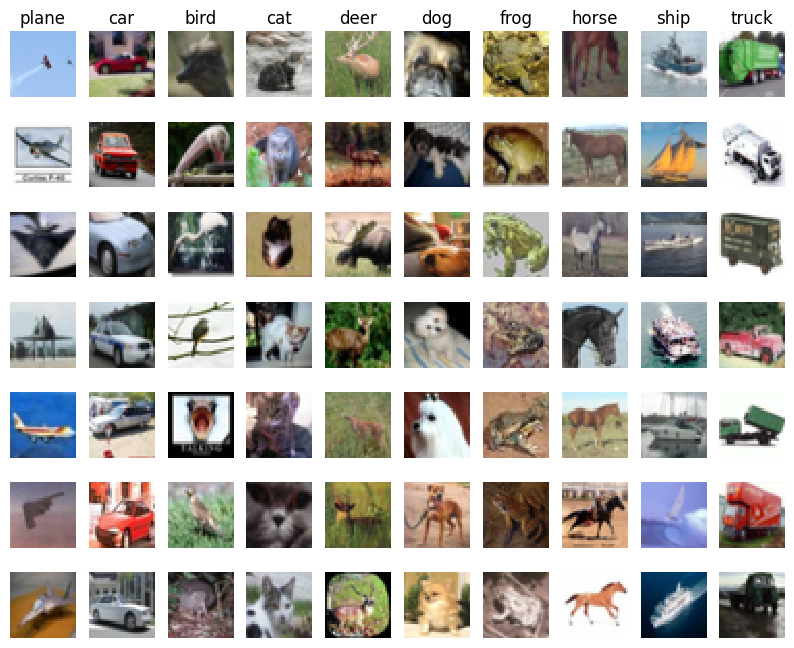

In [6]:
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']       #classes names
classes_number = classes.__len__()      #number of classes

samples_per_class =7        #number of samples to display per class

for y , className in enumerate(classes):        #y:class index (0-9) - className:class name (plane,car,...)
    indexes = np.nonzero(y_train == y)[0]       # get all indexes with class y (1st way method)
    # indexes = np.flatnonzero(y_train == y)    # get all indexes with class y (2nd way method)
    
    #Choose random samples per class from the indexes (بدون تكرار)
    indexes = np.random.choice(indexes, samples_per_class, replace=False)    
    
    
    for i , index in enumerate(indexes):        # i: sample index (0-6) - index: actual index in the dataset
        plt_idx = i * classes_number + y + 1        # calculate the subplot index
        plt.subplot(samples_per_class, classes_number, plt_idx)     #creating subplot
        plt.imshow(X_train[index].astype('uint8'))      #display the image
        plt.axis('off')     
        if i == 0:      # display the class name above the first row of images
            plt.title(className)                        
plt.show()

In [ ]:
num_training_pts = 5000         #عدد نقاط التدريب


mask = list(range(num_training_pts))        #create a list of the first 5000 indices
X_train = X_train[mask]                     #select only the first 5000 training examples
y_train = y_train[mask]                     #select only the first 5000 training labels

num_test_pts = 500                          #عدد نقاط الاختبار
mask = list(range(num_test_pts))        #create a list of the first 500 indices
X_test = X_test[mask]           #select only the first 500 test examples
y_test = y_test[mask]       #select only the first 500 test labels  


X_train = np.reshape(X_train, (X_train.shape[0], -1))       #reshape training data to (num_samples,D) + D : the dimension of each image
X_test = np.reshape(X_test, (X_test.shape[0], -1))      #reshape test data to (num_samples,D) + D : the dimension of each image
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [ ]:
from Implementation.classifiers.KNearestNeighbor import KNearestNeighbor   #import the KNearestNeighbor class from the classifiers

clf= KNearestNeighbor()     #create an object of the KNearestNeighbor class
clf.train(X_train,y_train)      #train the classifier on the training data and labels


In [11]:
distance = clf.compute_distance_with_one_loops(X_test)      #compute the distance between test points and training points using one loop
print(distance.shape)

(500, 5000)


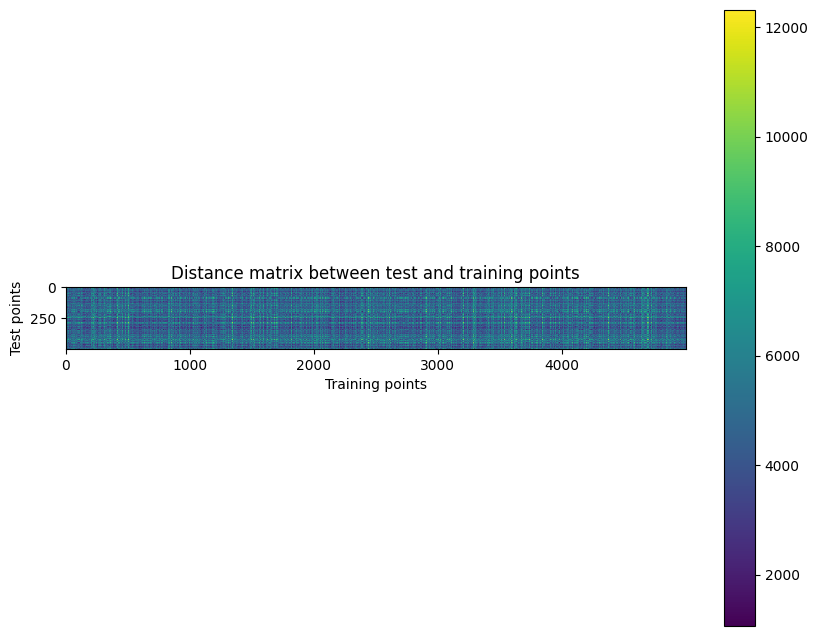

In [ ]:
plt.imshow(distance, interpolation='none',cmap='viridis')       #display the distance matrix as an image
plt.title('Distance matrix between test and training points')   #set title of the plot
plt.xlabel('Training points')
plt.ylabel('Test points')
plt.colorbar()      #display color scale
plt.show()

In [14]:
y_test_predicted = clf.predict_labels(distance, k=1)        #predict the labels of the test data using k=1
correct_predictions = np.sum(y_test_predicted == y_test)    #count the number of correct predictions
accuracy = float(correct_predictions) / num_test_pts    #calculate the accuracy
print(' %d of %d are correct predictions --- accuracy: %f' % (correct_predictions, num_test_pts, accuracy))     

 137 of 500 are correct predictions --- accuracy: 0.274000


In [15]:
y_test_predicted = clf.predict_labels(distance, k=10)       #predict the labels of the test data using k=10
num_correct = np.sum(y_test_predicted == y_test)        #count the number of correct predictions
accuracy = float(num_correct) / num_test_pts        #calculate the accuracy
print(' %d of %d are correct predictions --- accuracy: %f' % (num_correct, num_test_pts, accuracy))        

 141 of 500 are correct predictions --- accuracy: 0.282000
